In [14]:
# read in swear words
with open('data/swear_words.csv', 'r', encoding='utf-8') as f:
    swear_words = f.read().splitlines()
x

['ABS-Bremser',
 'Aa-Esser',
 'Aa-Gesicht',
 'Aa-Kopf',
 'Aa-Loch',
 'Aa-Wurst',
 'Aal',
 'Aalauge',
 'Aalficker',
 'Aalfresse',
 'Aalwurstverkäufer',
 'Aas',
 'Aasfresser',
 'Aasgeier',
 'Aasknochen',
 'Abart',
 'Abc-Schüler',
 'Abc-Schütze',
 'Abdecker',
 'Abdeckstiftbenutzer',
 'Abderit',
 'Abendvogel',
 'Abenteurer',
 'Abfall',
 'Abfall, biochemischer',
 'Abfallprodukt',
 'Abfalltonnenvollscheißer',
 'Abficker',
 'Abflussrohrgucker',
 'Abflussrohrsauger',
 'Abgaskakerlake',
 'Abgasproduzent',
 'Abgötter',
 'Abortdeckel',
 'Abschaum',
 'Abscheißer',
 'Abschiedswinker',
 'Abschmierer',
 'Abschreiber',
 'Abseiler',
 'Abseitserklärer',
 'Abspritzer',
 'Absturztorte',
 'Absturzvogel',
 'Abtrittfeger',
 'Abtrünniger',
 'Abtörner',
 'Abwasserschlürfer',
 'Abwichshure',
 'Abzocker',
 'Achselbaron',
 'Achselficker',
 'Achselgrind',
 'Achselhaarflechter',
 'Achselhaarföner',
 'Achselhaarratte',
 'Achselhaarspalter',
 'Achsellecker',
 'Achselschweißfontaine',
 'Achselträger',
 'Achterbahninde

In [18]:
swear_words = [word.lower() for word in swear_words]

In [6]:
# open dataset
import pandas as pd
df = pd.read_csv('export/v2_randomized_balanced_dataset.csv')
df.head(10)

,raw_text,severity,binary_label
0,"Und pinkelt dann vorne über die Brille, die Sa...",1.0,True
1,der menschenschrott darf alles,1.0,True
2,"Das gute daran ,dieses pack legt sich selber um",1.0,True
3,Und solches PACK soll Integriert werden ? Na p...,0.5,True
4,Bei der geistigen Umnachtung der deutschen Bun...,0.5,True
5,Der Typ ist lustig :) Das Motto von Ferkel un...,1.0,True
6,Bei soviel Dummheit bin ich sprachlos.,0.5,True
7,Wenn der Maas das Maul aufmacht ist das schon ...,1.0,True
8,"Naja, dann hat das Wort Lügenpresse durchaus B...",0.5,True
9,"Wenn sie gesagt hätte: """"#Domian´, ich hasse d...",0.5,True


In [22]:
def swear_word_percentage(txt):
    words = txt.split()
    
    total_words = len(words)
    in_swear_words = [word for word in words if word.lower() in swear_words]
    
    print(in_swear_words)
    
    return 100 / total_words * len(in_swear_words)
    
swear_word_percentage(df.iloc[0]['raw_text'])

['Sau']


9.090909090909092

In [23]:
df['%_swear_words'] = df['raw_text'].apply(lambda x: swear_word_percentage(x))

['Sau']
[]
[]
[]
[]
['Typ', 'Ferkel']
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
['Wichser']
[]
[]
[]
['weib']
[]
[]
[]
['Verbrecher']
[]
[]
[]
[]
['trottel']
[]
[]
[]
[]
[]
[]
[]
[]
[]
['nichts']
[]
['Tussi']
[]
['Monster']
[]
[]
[]
[]
['Arschkriecher']
[]
[]
['Gesindel']
[]
[]
[]
[]
[]
[]
['Sack']
[]
['Verbrecher']
[]
[]
[]
[]
['Verbrecher']
[]
[]
[]
['Idiot']
[]
[]
[]
[]
[]
['Kanonenfutter']
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
['niemand']
[]
[]
[]
[]
[]
[]
['Kinderficker']
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
['nichts']
[]
[]
['NICHTS', 'nichts']
['Hure', 'Hahn']
[]
['schlampe']
[]
[]
['Ferkel']
[]
[]
[]
[]
[]
['Versager']
[]
[]
[]
[]
[]
[]
['Schmarotzer']
[]
[]
[]
[]
[]
[]
['Mist']
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
['Idiot']
['Scheiße']
[]
[]
[]
[]
[]
[]
[]
[]
['Mist']
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
['Kinderficker', 'nichts']
[]
[]
['Abschaum']
[]
[]
['Mist']
[]
[]
[]
['abfall']
[]
[]
[]
[]
[]
[]
[]
[]
[]


In [24]:
from matplotlib import pyplot
import numpy as np
%matplotlib inline

In [35]:
hate = df[df['binary_label'] == True]
love = df[df['binary_label'] == False]

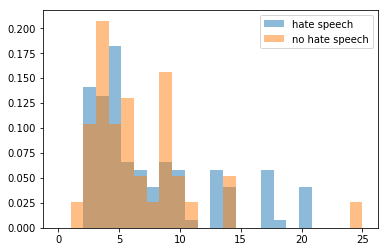

In [36]:
bins = np.linspace(0, 25, 25)

pyplot.hist(hate[hate['%_swear_words'] > 0]['%_swear_words'], bins, alpha=0.5, normed=True, label='hate speech')
pyplot.hist(love[love['%_swear_words'] > 0]['%_swear_words'], bins, alpha=0.5,  normed=True, label='no hate speech')

pyplot.legend(loc='upper right')
pyplot.show()

In [41]:
print(len(hate[hate['%_swear_words'] > 0]), ' / ', len(hate))
print(100/ len(hate) * (len(hate[hate['%_swear_words'] > 0])), '%')

118  /  733
16.098226466575717 %


In [42]:
print(len(love[love['%_swear_words'] > 0]), ' / ', len(love))
print(100/ len(love) * (len(love[love['%_swear_words'] > 0])), '%')

38  /  882
4.308390022675737 %


Maybe?

# Hatebase Voc

In [46]:
import json

with open('data/hatebase_voc.json', encoding='utf-8') as json_file:  
    data = json.load(json_file)

In [47]:
for word in data['result']:
    print(word['term'])

itzige
itzigs
itzig
spastic
Piefke
Missgeburt
Fotze
Fotzen
Schnorrer
Nazi
Neger
Ziegenfickers
Wasserpolacken
Wasserpolackin
Überfremdungen
Teppichfliegers
Schwarzkopfes
Schwarzkopfs
schwuler
schwulette
Schleiereulen
Schlitzaugen
Schwarzköpfe
Polacken
Polackin
Ölauges
Ölaugen
Muchels
Kümmeltürken
Käsköppe
homos
dorfmatratzen
Weltjudentum
Überfremdung
Wasserpolacke
Teppichflieger
Sozialschmarotzer
Sozialparasit
schwul
Schlitzauges
schlitzäugig
Schwarzkopf
Schwarzköpfchen 
Schleiereule
Polacke
Ölauge
negermusik
mischlingskinder
Muchel
Kümmeltürke
Käskopp
Huren
Inselaffe
Hürchen
homo
gottlos
Geschwuchtel
flittchen
dorfmatratze
Makaronifresser
Lugenpresse
Luegenpresse
Asylschmarotzer
Ziegenficker
Bazi
zigeuner
Katzenfresser
Tschusch
Kanaker
Kanacke
Fritz
scheiss Ami
Inselaffen
Adolf
Piffke
Judenschwein
Judensau
Untermenschen
Untermensch
Penner
Krueppel
Braun
Spasti
Spast
Schlitzauge
Japse
Froschschenkelfresser
Polake
Tunte
Hure
Schlampe
Schwanzlutscher
Sack
Schwuchtel
Ami


In [51]:
hatebase_voc = [word['term'].lower() for word in data['result']]
hatebase_voc

['itzige',
 'itzigs',
 'itzig',
 'spastic',
 'piefke',
 'missgeburt',
 'fotze',
 'fotzen',
 'schnorrer',
 'nazi',
 'neger',
 'ziegenfickers',
 'wasserpolacken',
 'wasserpolackin',
 'überfremdungen',
 'teppichfliegers',
 'schwarzkopfes',
 'schwarzkopfs',
 'schwuler',
 'schwulette',
 'schleiereulen',
 'schlitzaugen',
 'schwarzköpfe',
 'polacken',
 'polackin',
 'ölauges',
 'ölaugen',
 'muchels',
 'kümmeltürken',
 'käsköppe',
 'homos',
 'dorfmatratzen',
 'weltjudentum',
 'überfremdung',
 'wasserpolacke',
 'teppichflieger',
 'sozialschmarotzer',
 'sozialparasit',
 'schwul',
 'schlitzauges',
 'schlitzäugig',
 'schwarzkopf',
 'schwarzköpfchen ',
 'schleiereule',
 'polacke',
 'ölauge',
 'negermusik',
 'mischlingskinder',
 'muchel',
 'kümmeltürke',
 'käskopp',
 'huren',
 'inselaffe',
 'hürchen',
 'homo',
 'gottlos',
 'geschwuchtel',
 'flittchen',
 'dorfmatratze',
 'makaronifresser',
 'lugenpresse',
 'luegenpresse',
 'asylschmarotzer',
 'ziegenficker',
 'bazi',
 'zigeuner',
 'katzenfresser',
 't

In [54]:
def hatebase_voc_percentage(txt):
    words = txt.split()
    
    total_words = len(words)
    in_swear_words = [word for word in words if word.lower() in hatebase_voc]
    
    print(in_swear_words)
    
    return 100 / total_words * len(in_swear_words)
    
hatebase_voc_percentage(df.iloc[0]['raw_text'])

[]


0.0

In [55]:
df['%_hatebase_words'] = df['raw_text'].apply(lambda x: hatebase_voc_percentage(x))

[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
['Sack', 'Adolf']
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
['Hure']
[]
['schlampe']
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
['braun']
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
['Spasti']
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]


In [56]:
hate = df[df['binary_label'] == True]
love = df[df['binary_label'] == False]

In [57]:
print(len(hate[hate['%_hatebase_words'] > 0]), ' / ', len(hate))
print(100/ len(hate) * (len(hate[hate['%_hatebase_words'] > 0])), '%')

15  /  733
2.0463847203274215 %


In [58]:
print(len(love[love['%_swear_words'] > 0]), ' / ', len(love))
print(100/ len(love) * (len(love[love['%_swear_words'] > 0])), '%')

38  /  882
4.308390022675737 %


In [59]:
df

,raw_text,severity,binary_label,%_swear_words,%_hatebase_words
0,"Und pinkelt dann vorne über die Brille, die Sa...",1.0,True,9.090909,0.0
1,der menschenschrott darf alles,1.0,True,0.000000,0.0
2,"Das gute daran ,dieses pack legt sich selber um",1.0,True,0.000000,0.0
3,Und solches PACK soll Integriert werden ? Na p...,0.5,True,0.000000,0.0
4,Bei der geistigen Umnachtung der deutschen Bun...,0.5,True,0.000000,0.0
5,Der Typ ist lustig :) Das Motto von Ferkel un...,1.0,True,10.526316,0.0
6,Bei soviel Dummheit bin ich sprachlos.,0.5,True,0.000000,0.0
7,Wenn der Maas das Maul aufmacht ist das schon ...,1.0,True,0.000000,0.0
8,"Naja, dann hat das Wort Lügenpresse durchaus B...",0.5,True,0.000000,0.0
9,"Wenn sie gesagt hätte: """"#Domian´, ich hasse d...",0.5,True,0.000000,0.0


In [60]:
df = df[['raw_text', 'severity', 'binary_label', '%_swear_words']]
df

,raw_text,severity,binary_label,%_swear_words
0,"Und pinkelt dann vorne über die Brille, die Sa...",1.0,True,9.090909
1,der menschenschrott darf alles,1.0,True,0.000000
2,"Das gute daran ,dieses pack legt sich selber um",1.0,True,0.000000
3,Und solches PACK soll Integriert werden ? Na p...,0.5,True,0.000000
4,Bei der geistigen Umnachtung der deutschen Bun...,0.5,True,0.000000
5,Der Typ ist lustig :) Das Motto von Ferkel un...,1.0,True,10.526316
6,Bei soviel Dummheit bin ich sprachlos.,0.5,True,0.000000
7,Wenn der Maas das Maul aufmacht ist das schon ...,1.0,True,0.000000
8,"Naja, dann hat das Wort Lügenpresse durchaus B...",0.5,True,0.000000
9,"Wenn sie gesagt hätte: """"#Domian´, ich hasse d...",0.5,True,0.000000


In [61]:
df.to_csv('export/v3_randomized_balanced_dataset.csv', index=False)
df.to_excel('export/v3_randomized_balanced_dataset.xlsx', index=False)



%20Und%20wir%20haben%20tausend%20mit%20%22dicken%20Eiern%22%20hier.%20Es%20wird%20hoch%20an%20der%20Zeit,%20daß%20die%20%22Refutschies%20Wellkam%22-Genderweiber%20nicht%20nur%20Matratzen%20und%20Feldbetten%20spenden,%20sondern%20sich%20gleich%20drauflegen...' with link or location/anchor > 255 characters since it exceeds Excel's limit for URLS
  force_unicode(url))
C:\Users\pascal\Anaconda3\lib\site-packages\xlsxwriter\worksheet.py:912: UserWarning: Ignoring URL 'https://youtu.be/Xyu-3I3mweI%20%20%20Es%20gibt%20keine%20Gerechtigkeit,%20bis%20die%20muslimische%20Terroristen%20zerstört%20die%20Gräber%20der%20Christen%20und%20Kreuze%20und%20ging%20nach%20Europa%20Asyl%20suchen,%20um%20sie%20in%20der%20Zukunft%20zu%20zerstören' with link or location/anchor > 255 characters since it exceeds Excel's limit for URLS
  force_unicode(url))
